# Validation and Learning Curves

#### Veriyi Hazırlama

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

#### cross_validation uygulama

In [2]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, data, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

#### Negatif-mean-absolute-error metriği kullanıldığı için score'lar errorların negatifidir

In [3]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

#### Train ve test errolerini görselleştirme

Burada görüdlüğü üzere train errorü çok az, test errorü çok daha fazla. Model yüksek ihtimal **overfit** olmuş diyebiliriz.

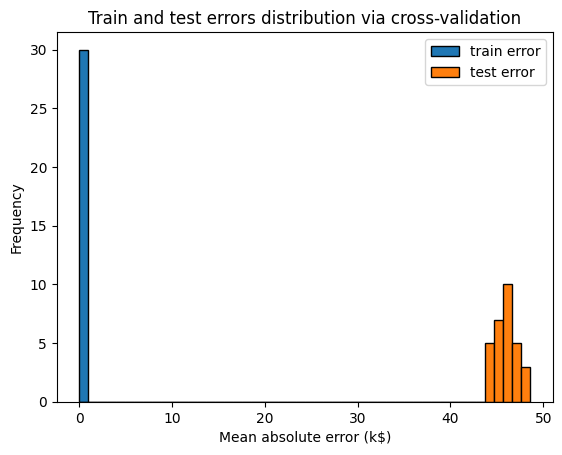

In [4]:
import matplotlib.pyplot as plt

scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

#### Overfit-Underfit tespiti için validation_curve

In [5]:
from sklearn.model_selection import validation_curve

max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    regressor, data, target, param_name="max_depth", param_range=max_depth,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

#### validation_curve görselleştirme

Burada dikkat edilirse max_depth = 10 optimum noktadır buraya kadar testing error sürekli düşmektedir. 10'dan sonra ise artmaktadır. 10 altı underfitting, 10 üstü overfitting olarak değerlendirilir.

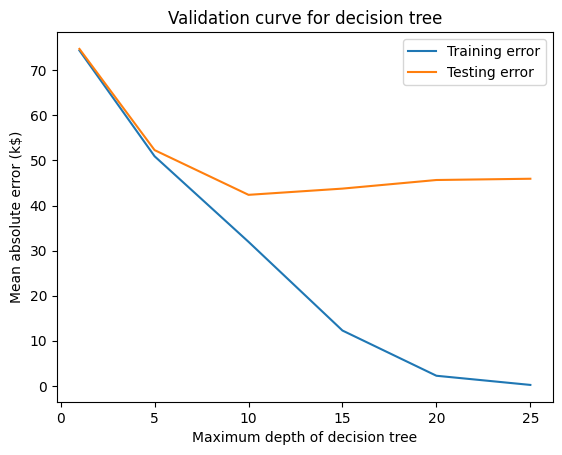

In [6]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

#### validation_curve görseleştirilmesine varyans eklenmesi

Burada sonuçlara bakarsak varyans düşük olduğundan validation_curve'e güvenebiliriz.

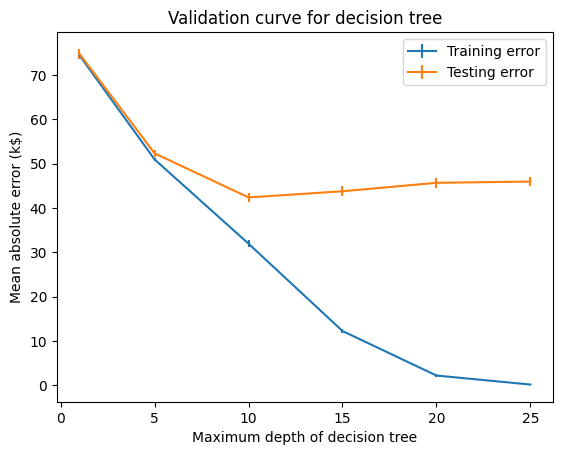

In [7]:
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")